In [2]:
import sys
import gensim
print (sys.path)
import os
from os.path import exists
import re
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import datetime
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
# from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from keras.layers import Dropout
# use natural language toolkit
from scipy import sparse
import nltk
from nltk import punkt
from nltk.stem.lancaster import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction import stop_words
import sklearn.datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
recall_score, classification_report, confusion_matrix, multilabel_confusion_matrix, precision_recall_fscore_support
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import plotly.graph_objs as go
from keras import backend as K
from numpy import where
from tensorflow.python.client import device_lib

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# connect to local google drive if using google colab by un-commenting the below commands
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('You are using a normal-RAM runtime!')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
# check if GPU is used
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5908192709717843300
]


In [ ]:
# import the word2vec model with pre-trained vectors trained on part of Google News dataset (about 100 billion words). 
# The model contains 300-dimensional vectors for 3 million words and phrases. Link here to the official web page for this project -- https://code.google.com/archive/p/word2vec/
# Per the official website link above, one could download the model as a gz file from the archives here -- https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit (or) 
# Clone from github from here which is a mirrored copy according to the github author-- https://github.com/mmihaltz/word2vec-GoogleNews-vectors
# Below is an import link from my personal google drive. This needs to be changed to point to the model file as appropriate.
vec_model = gensim.models.KeyedVectors.load_word2vec_format('drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('You are using a normal-RAM runtime!')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
print(vec_model.wv['the'])

[ 0.08007812  0.10498047  0.04980469  0.0534668  -0.06738281 -0.12060547
  0.03515625 -0.11865234  0.04394531  0.03015137 -0.05688477 -0.07617188
  0.01287842  0.04980469 -0.08496094 -0.06347656  0.00628662 -0.04321289
  0.02026367  0.01330566 -0.01953125  0.09277344 -0.171875   -0.00131989
  0.06542969  0.05834961 -0.08251953  0.0859375  -0.00318909  0.05859375
 -0.03491211 -0.0123291  -0.0480957  -0.00302124  0.05639648  0.01495361
 -0.07226562 -0.05224609  0.09667969  0.04296875 -0.03540039 -0.07324219
  0.03271484 -0.06176758  0.00787354  0.0035553  -0.00878906  0.0390625
  0.03833008  0.04443359  0.06982422  0.01263428 -0.00445557 -0.03320312
 -0.04272461  0.09765625 -0.02160645 -0.0378418   0.01190186 -0.01391602
 -0.11328125  0.09326172 -0.03930664 -0.11621094  0.02331543 -0.01599121
  0.02636719  0.10742188 -0.00466919  0.09619141  0.0279541  -0.05395508
  0.08544922 -0.03686523 -0.02026367 -0.08544922  0.125       0.14453125
  0.0267334   0.15039062  0.05273438 -0.18652344  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
vocab_size = len(vec_model.wv.vocab)
print(vocab_size)

3000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [7]:
# import the dataset from the Dataset folder
df = pd.read_csv('/NFR_CSV.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class_name  914 non-null    object
 1   sentence    914 non-null    object
dtypes: object(2)
memory usage: 14.4+ KB


In [8]:
df.class_name.value_counts()

Security           354
Usability          157
Operability        153
Maintainability    137
Performance        113
Name: class_name, dtype: int64

In [9]:
#function to print out a specific observation by passing the index of that in the dataset
def print_plot(index):
    example = df[df.index == index][['sentence', 'class_name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Req_Class:', example[1])
print_plot(10)

The maximum wait time for a user navigating from one screen to another within the Disputes application shall be no more than 5 seconds.
Req_Class: Performance


In [10]:
print_plot(100)

The system shall have a response time where the average transaction on the server needs to occur on average less than 1 second.
Req_Class: Performance


In [ ]:
df = df.reset_index(drop=True)
#Regex options to find the special characters
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
#Regex options to find the bad symbols
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
#Import stopwords from the nltk.corpus and apply to the data
STOPWORDS = set(stopwords.words('english'))
# Custom words found by manually looking at the dataset observations
ignore_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
    'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
    'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
    'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
    'against', 'between', 'into', 'through', 'during', 'before', 'after', 
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 
    'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
    'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 
    'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 
    '?', '%', '/', '(', ')', '[', ']', '-', ':', ';', 'system', 'product', 
    'application', 'should', 'would', 'shall', 'go', 'System', 'system.', 
    'System.','â€',"'",]

#function to perform data cleansing steps to convert to lower case, remove stop words, and to ignore custom words from the list manually gleaned as shown above
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE.sub(' ', text) # replace REPLACE_BY_SPACE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE with space.
    text = BAD_SYMBOLS.sub('', text) # remove symbols which are in BAD_SYMBOLS from text. substitute the matched string in BAD_SYMBOLS with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = ' '.join(word for word in text.split() if word not in ignore_words) # remove words unique to requirements dataset
    return text
#apply the function on the df from previous step    
df['sentence'] = df['sentence'].apply(clean_text)
#replace all digits by nothing
df['sentence'] = df['sentence'].str.replace('\d+', '')

In [ ]:
# Setting the maximum number of words in the overall dataset.
word_vectors=vec_model.wv
MAX_NB_WORDS = 50000
# Setting the ceiling for the maximum number of words in each requirement.
MAX_SEQUENCE_LENGTH = 250
# Setting the number of dimensions to be used, since this word2vec model uses 300, this is fixed.
EMBEDDING_DIM = 300
# Invoke Tokenizer function by creating an instance of it
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fitting the instance on the data
tokenizer.fit_on_texts(df['sentence'].values)
# Saving the output of the tokenizer into different variables
word_index = tokenizer.word_index
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
# Prints the unique number of tokens which are basically unique words after the cleaning process and tokenization process
print('Found %s unique tokens.' % len(word_index))
# This print each unique word and the number of occurrences of each word
print(word_docs)
print(word_index)
# prints the unique words parsed from the nth requirement
print_plot(1)

Found 2008 unique tokens.
defaultdict(<class 'int'>, {'seconds': 47, 'every': 11, 'refresh': 3, 'display': 15, 'uptodate': 2, 'data': 108, 'fast': 8, 'keep': 2, 'respond': 3, 'search': 15, 'results': 6, 'produce': 2, 'acceptable': 6, 'time': 57, 'returned': 12, 'criteria': 5, 'later': 4, 'user': 114, 'entered': 13, 'report': 21, 'cma': 4, 'generate': 7, 'contacts': 2, 'appointments': 3, 'synchronize': 4, 'hour': 2, 'office': 6, 'manner': 5, 'able': 99, 'set': 13, 'timely': 2, 'tasks': 8, 'members': 13, 'complete': 14, 'staff': 16, 'general': 4, 'schedule': 2, 'take': 16, 'student': 4, 'generation': 2, 'management': 27, 'longer': 13, 'response': 27, 'maimum': 9, 'within': 71, 'one': 16, 'screen': 9, 'navigating': 4, 'disputes': 33, 'another': 7, 'wait': 2, 'users': 114, 'performance': 6, 'support': 41, 'without': 19, 'degradation': 2, 'concurrent': 4, 'recycled': 9, 'parts': 12, 'repair': 8, 'facility': 13, 'preferred': 7, 'audit': 6, 'occur': 4, 'ratings': 3, 'saved': 3, 'save': 2, 'fl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [ ]:
#Transforms each text in df['sentence'] to a sequence of integers
X = tokenizer.texts_to_sequences(df['sentence'].values)
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (914, 250)


In [ ]:
# Find the word from the data in the word2vec model and pass the vector back
def getVector(str):
  if str in vec_model.wv:
    return vec_model.wv[str]
  else:
    return None;

In [ ]:
# Below are steps required to identify each unique token (word parsed and cleaned) from the tokenizer to obtain the word2vec vector matrix to be used in the subsequent model development
# set the matrix size to the number of unique tokens + 1 to avoid out of bounds error
wsize=len(tokenizer.word_index)+1
# Initialize the weighting matrix to be used in the model below
wv_matrix=np.zeros((wsize,300))
# for every unique word in the tokenizer get the vector from word2vec model
for word, i in tokenizer.word_index.items():
  embedding_vector = getVector(word)
  if embedding_vector is not None:
    wv_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [ ]:
print(len(wv_matrix))
# print the unique weighted matrix value for the nth word as received by running it through the word2vec model
print(wv_matrix[7])

2009
[-7.42187500e-02  1.12792969e-01  9.47265625e-02  7.17773438e-02
  4.95605469e-02  6.22558594e-02  4.66308594e-02 -9.57031250e-02
  2.12890625e-01 -7.22656250e-02 -4.24804688e-02 -2.67578125e-01
 -1.90429688e-01  1.60156250e-01 -4.51660156e-02  2.47070312e-01
  1.12792969e-01  3.32031250e-01  9.64355469e-03  1.50390625e-01
  1.13769531e-01 -1.61132812e-01  5.46875000e-02  1.79687500e-01
  1.51367188e-02  1.75781250e-02 -1.87500000e-01  7.66601562e-02
  3.39355469e-02 -1.25976562e-01 -1.91406250e-01  3.90625000e-03
  7.56835938e-02 -2.83203125e-01 -2.00195312e-01 -5.05371094e-02
  1.32812500e-01  1.43554688e-01 -1.66015625e-01  9.08203125e-02
 -3.73046875e-01 -8.00781250e-02 -1.90429688e-01  9.37500000e-02
 -1.16699219e-01 -1.81640625e-01  8.44726562e-02  9.13085938e-02
 -1.86767578e-02 -2.05993652e-03  4.15039062e-02 -2.67333984e-02
 -8.25195312e-02  1.28906250e-01 -1.17797852e-02 -4.88281250e-02
 -5.41992188e-02 -1.08398438e-01 -1.04492188e-01 -8.00781250e-02
 -9.03320312e-02  1.

In [ ]:
# Y = pd.get_dummies(df['class_name'])
Y = pd.get_dummies(df['class_name']).values
print('Shape of label tensor:', Y.shape)
y, y_uniques=pd.factorize(df['class_name'], sort=True)
print(y)
print(Y)

Shape of label tensor: (914, 5)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 34)
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X,y, test_size = 0.10, random_state = 34)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_train_n.shape,Y_train_n.shape)
print(X_test_n.shape,Y_test_n.shape)
print(Y_train, Y_test)
print(Y_train_n, Y_test_n)
# print(y_tr_unique)
original_text_t=[]
original_text =  list(map(sequence_to_text, X_test))
for i in range(0,len(original_text)):
    temp = []
    for j in range(0,len(original_text[i])):
        if(original_text[i][j]!=None):
            temp.append(original_text[i][j])
    original_text_t.append(temp)
# print(my_texts_t)
# print(len(my_texts_t))

(822, 250) (822, 5)
(92, 250) (92, 5)
(822, 250) (822,)
(92, 250) (92,)
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]] [[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]

In [ ]:
def test_class(i):
    switcher={
            0:'Main',
            1:'Oper',
            2:'Perf',
            3:'Secu',
            4:'Usab'
         }
    return switcher.get(i,"Invalid class")

In [ ]:
def create_model():
    #The TensorFlow Keras API makes easy to build models and experiment while Keras handles the complexity of connecting everything together. 
    #The tf.keras.Sequential model is a linear stack of layers. 
    #In this case, one LSTM layer with 100 nodes each, and an output layer with 5 nodes representing our label predictions. 
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index) + 1, EMBEDDING_DIM, weights=[wv_matrix], trainable=False, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])    
    print(model.summary())
    return model

In [ ]:
def make_con_mat(cf_matrix, class_name):
    plt.title("Confusion Matrix Heat Map for class: %s" % class_name)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(len(wv_matrix))

2009


In [ ]:
# fix random seed for reproducibility
seed = 123
batch_size = 30
# define 10-fold cross validation test 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscorespre = []
cvscoresrec = []
cvscoresauc = []
cvscoresf1=[]
for train_index, val_index in kfold.split(X_train,Y_train_n):
    print("TRAIN:", train_index, "VAL:", val_index)
#     X_train_k, X_val, Y_train_k, Y_val = train_test_split(X, Y_train, test_size = 0.10, random_state = 34)  
    X_train_k, X_val = X_train[train_index], X_train[val_index]
    Y_train_k, Y_val = Y_train[train_index], Y_train[val_index]
    print(X_train_k, X_val, Y_train_k, Y_val)
    model=create_model()
    history=model.fit(X_train_k, Y_train_k,epochs=20,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
#     history=model.fit(X_train_k, Y_train_k,epochs=10,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])    
#     history=model.fit(X_train, Y_train,epochs=50,batch_size=batch_size,validation_split=0.1)
    scores=model.evaluate(X_val,Y_val)
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
    print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
    cvscoresauc.append(scores[2] * 100)
    cvscorespre.append(scores[3] * 100)
    cvscoresrec.append(scores[4] * 100)
    cvscoresf1.append(2*(scores[3]*scores[4])/(scores[3]+scores[4]+tf.keras.backend.epsilon()) * 100)
    Y_pred=model.predict(X_val)
    Y_pred_cm = (Y_pred.argmax(1)[:,None] == np.arange(Y_pred.shape[1])).astype(int)
    con_mat = multilabel_confusion_matrix(Y_val, Y_pred_cm, labels=[0, 1, 2, 3, 4])
    # plt.figure()
    # print("****************************Confustion Matrix Plots Start here for a new fold**************")
    # class_name = "Maintainability"
    # make_con_mat(con_mat[0],class_name)
    # plt.figure()
    # class_name = "Operability"
    # make_con_mat(con_mat[1], class_name)
    # plt.figure()
    # class_name = "Performance"
    # make_con_mat(con_mat[2],class_name)
    # plt.figure()
    # class_name = "Security"
    # make_con_mat(con_mat[3], class_name)
    # plt.figure()
    # class_name = "Usability"
    # make_con_mat(con_mat[4],class_name)

TRAIN: [  2   3   4   5   6   8   9  10  11  13  14  16  17  18  19  20  21  22
  23  24  26  27  28  29  30  31  32  33  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  68  69  70  71  72  73  75  76  77  78  79  80
  83  85  86  87  88  89  90  91  93  95  97  98  99 100 101 102 103 104
 105 106 107 109 110 111 112 113 115 116 117 118 119 120 121 122 123 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 142 143 144
 145 147 148 149 150 152 154 155 156 157 158 159 160 162 163 164 165 166
 167 168 169 172 173 174 175 177 178 179 180 181 182 183 184 185 186 187
 188 190 191 192 193 194 195 196 197 198 199 201 202 203 204 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 268 269 270 271 272 273 274 276 277 278

In [ ]:
# Calculating Mean Average of model scores
print("Mean & std for Area under Curve: %.2f%% (+/- %.2f%%)" % (np.mean(cvscoresauc), np.std(cvscoresauc)))
print("Mean & std for Precision: %.2f%% (+/- %.2f%%)" % (np.mean(cvscorespre), np.std(cvscorespre)))
print("Mean & std for Recall: %.2f%% (+/- %.2f%%)" % (np.mean(cvscoresrec), np.std(cvscoresrec)))
print(("Mean & std for F1 score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscoresf1), np.std(cvscoresf1))))

Mean & std for Area under Curve: 95.37% (+/- 1.27%)
Mean & std for Precision: 86.10% (+/- 3.59%)
Mean & std for Recall: 78.71% (+/- 3.69%)
Mean & std for F1 score: 82.20% (+/- 3.19%)


Maximum Training Accuracy: 0.8933933973312378
Maximum Validation Accuracy: 0.8783783912658691
Minimum Training Loss: 0.32115638256073
Minimum Validation Loss: 0.5445124506950378


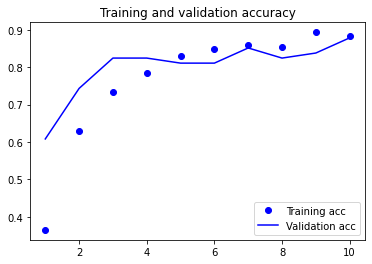

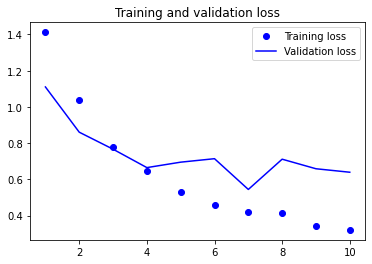

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("Maximum Training Accuracy: %s" % np.max(history.history['acc']))
print("Maximum Validation Accuracy: %s" % np.max(history.history['val_acc']))
print("Minimum Training Loss: %s"  % np.min(history.history['loss']))
print("Minimum Validation Loss: %s" % np.min(history.history['val_loss']))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

3/3 [==============================] - 0s 95ms/step - loss: 0.5002 - acc: 0.8478 - auc_9: 0.9655 - precision_9: 0.9125 - recall_9: 0.7935
Test set
  Loss: 0.500
  Accuracy: 0.848
[[3.63485031e-02 3.70062411e-01 4.77510840e-02 2.13546474e-02
  5.24483383e-01]
 [2.85096258e-01 1.90596040e-02 5.46579668e-03 5.25869392e-02
  6.37791395e-01]
 [2.98311319e-02 1.19173400e-01 4.05492634e-02 7.96141803e-01
  1.43043362e-02]
 [9.95160162e-01 5.65138005e-04 6.26616893e-05 3.68367322e-03
  5.28410892e-04]
 [2.46269405e-02 2.92388611e-02 6.47306666e-02 9.86813903e-02
  7.82722116e-01]
 [1.99596137e-01 4.79356945e-02 2.38754859e-04 7.37031341e-01
  1.51979811e-02]
 [1.40964636e-03 1.22885257e-02 2.46401236e-04 9.85324442e-01
  7.30961445e-04]
 [2.27170084e-02 3.49746048e-01 4.65605050e-01 1.50925606e-01
  1.10063124e-02]
 [4.67078120e-01 1.78021491e-01 8.97760317e-02 2.43537188e-01
  2.15872377e-02]
 [3.45087081e-01 1.49353419e-03 7.24548125e-04 7.58019164e-02
  5.76892972e-01]
 [9.65739484e-04 3.36

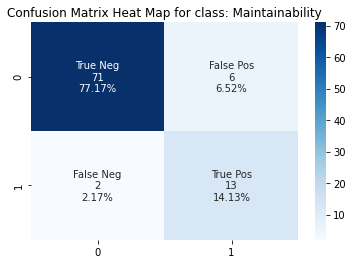

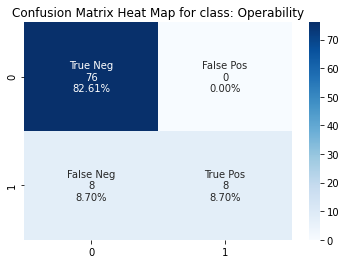

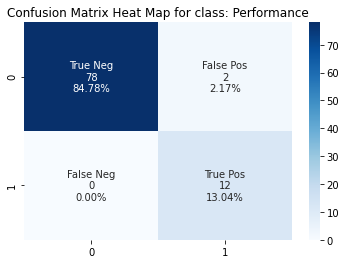

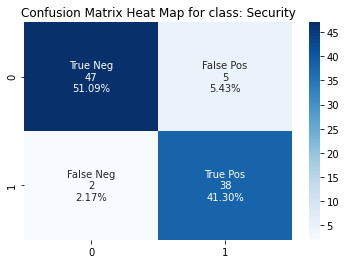

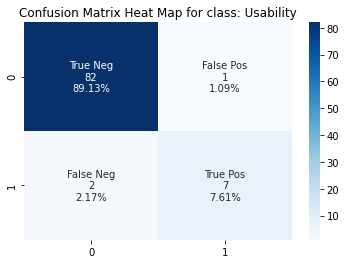

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
Y_pred_test=model.predict(X_test)
print(Y_pred_test)
Y_pred_test_cm = (Y_pred_test.argmax(1)[:,None] == np.arange(Y_pred_test.shape[1])).astype(int)
con_mat_test = multilabel_confusion_matrix(Y_test, Y_pred_test_cm, labels=[0, 1, 2, 3, 4])
plt.figure()
print("****************************Confustion Matrix Plots Start here for Test Data**************")
class_name = "Maintainability"
make_con_mat(con_mat_test[0],class_name)
plt.figure()
class_name = "Operability"
make_con_mat(con_mat_test[1], class_name)
plt.figure()
class_name = "Performance"
make_con_mat(con_mat_test[2],class_name)
plt.figure()
class_name = "Security"
make_con_mat(con_mat_test[3], class_name)
plt.figure()
class_name = "Usability"
make_con_mat(con_mat_test[4],class_name)

In [ ]:
Y_pred_main = [i[0] for i in Y_pred_test]
Y_pred_oper = [i[1] for i in Y_pred_test]
Y_pred_perf = [i[2] for i in Y_pred_test]
Y_pred_secu = [i[3] for i in Y_pred_test]
Y_pred_usab = [i[4] for i in Y_pred_test]
Y_test_main = [i[0] for i in Y_test]
Y_test_oper = [i[1] for i in Y_test]
Y_test_perf = [i[2] for i in Y_test]
Y_test_secu = [i[3] for i in Y_test]
Y_test_usab = [i[4] for i in Y_test]
Y_test_class=[]
for i in range(0,len(Y_test)):
    for j in range(0,len(Y_test[i])):
        if (Y_test[i][j]==1):
            Y_test_class.append(test_class(j))
print(Y_test_class)
Y_pred_class=[]
for i in range(0,len(Y_pred_test_cm)):
    for j in range(0,len(Y_pred_test_cm[i])):
        if (Y_pred_test_cm[i][j]==1):
            Y_pred_class.append(test_class(j))
print(Y_pred_class)
print(len(Y_test_class))
print(len(Y_pred_class))
print(len(original_text_t))

['Usab', 'Usab', 'Secu', 'Main', 'Usab', 'Secu', 'Secu', 'Perf', 'Oper', 'Usab', 'Perf', 'Main', 'Secu', 'Secu', 'Secu', 'Usab', 'Main', 'Main', 'Main', 'Secu', 'Oper', 'Secu', 'Oper', 'Secu', 'Perf', 'Oper', 'Main', 'Secu', 'Secu', 'Secu', 'Secu', 'Secu', 'Main', 'Secu', 'Oper', 'Main', 'Main', 'Secu', 'Secu', 'Perf', 'Secu', 'Oper', 'Oper', 'Oper', 'Secu', 'Perf', 'Oper', 'Oper', 'Usab', 'Oper', 'Secu', 'Perf', 'Secu', 'Secu', 'Secu', 'Main', 'Secu', 'Perf', 'Perf', 'Secu', 'Secu', 'Secu', 'Usab', 'Oper', 'Secu', 'Secu', 'Secu', 'Perf', 'Oper', 'Perf', 'Main', 'Main', 'Main', 'Secu', 'Usab', 'Secu', 'Secu', 'Oper', 'Secu', 'Perf', 'Oper', 'Secu', 'Oper', 'Secu', 'Secu', 'Usab', 'Main', 'Secu', 'Main', 'Perf', 'Secu', 'Secu']
['Usab', 'Usab', 'Secu', 'Main', 'Usab', 'Secu', 'Secu', 'Perf', 'Main', 'Usab', 'Perf', 'Secu', 'Secu', 'Secu', 'Secu', 'Usab', 'Main', 'Main', 'Main', 'Secu', 'Oper', 'Secu', 'Oper', 'Secu', 'Perf', 'Oper', 'Main', 'Secu', 'Secu', 'Secu', 'Main', 'Secu', 'Main'

In [ ]:
#combine y_test, x_test, y_pred_test_cm
combined_output = list(zip(original_text_t,Y_test_main,Y_test_oper,Y_test_perf,Y_test_secu,Y_test_usab,Y_test_class,Y_pred_main,Y_pred_oper,Y_pred_perf,
                          Y_pred_secu,Y_pred_usab, Y_pred_class))
combined_output
dfo = pd.DataFrame(combined_output,columns=['X_test','Y_test_main','Y_test_oper','Y_test_perf','Y_test_secu','Y_test_usab',
                                           'Y_test_class','Y_pred_main','Y_pred_oper','Y_pred_perf','Y_pred_secu','Y_pred_usab',
                                           'Y_pred_class'])
dfo.to_csv('out.csv', index=False)

# New Section

In [ ]:
new_requirement = ['Passwords should be held to a standard and be required to change at intervals.']
seq = tokenizer.texts_to_sequences(new_requirement)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Maintainability', 'Operability', 'Performance','Security','Usability']
print(pred, labels[np.argmax(pred)])

[[0.01051396 0.00614817 0.00124734 0.980873   0.00121756]] Security


***************Some try out code below: Commented out in case if it would be needed later

In [ ]:
# #mapping target variable's classes to unique labels and then to one hot labels
# labels = sorted(list(set(df['class_name'].tolist())))
# one_hot = np.zeros((len(labels), len(labels)), int)
# np.fill_diagonal(one_hot, 1)
# label_dict = dict(zip(labels, one_hot))
# num_labels = []
# for z in range(len(labels)):
#     num_labels.append(z)

# num_label_dict = dict(zip(labels, num_labels))

# x_raw = df['sentence'].apply(lambda x: clean_text(x)).tolist()
# y_raw = df['class_name'].apply(lambda y: label_dict[y]).tolist()
# y_raw_num = df['class_name'].apply(lambda y: num_label_dict[y]).tolist() #current class stored as 1 - as before
# y = np.array(y_raw)
# y_num = np.array(y_raw_num)
# print(y,y_num)

In [ ]:
# print(X_test)
# for value in range(0,len(X_test)):
#     X_test_1[value] = X_test[value] != 0
#     print(X_test_0[value])
# # print(Y_test_text)
# # X_test_0 = X_test[X_test != 0]
# # print(X_test_0)
# # X_test_text = list(map(sequence_to_text, X_test_0))
# # print(X_test_text)

In [ ]:
# Y_test_text =  list(map(sequence_to_text, Y_test))
# print(Y_test_text)
# Y_test_cm_text = list(map(sequence_to_text, Y_pred_test_cm))
# print(Y_test_cm_text)
# X_test_text = list(map(sequence_to_text, X_test))
# print(X_test_text)

In [ ]:
# # Y_test_no_0 = list(filter(lambda num: num != 0, Y_test))
# Y_test_text = Y_test
# for value in range(0,len(Y_test_text)):
#     if Y_test_text[value] <= 0:
#         del Y_test_text[value]
#         print(Y_test_text)
# print(Y_test_text)
# # Y_test_text =  list(map(sequence_to_text, Y_test_no_0))
# # print(Y_test_text)
# # Y_test_cm_text = list(map(sequence_to_text, Y_pred_test_cm))
# # print(Y_test_cm_text)
# # X_test_text = list(map(sequence_to_text, X_test))
# # print(X_test_text)

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)  
# estimator = KerasClassifier(build_fn=create_model, epochs=3, batch_size=60, verbose=0)
# kfold = KFold(n_splits=2, shuffle=True)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(results)

In [ ]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(df['class_name'])
# encoded_Y = encoder.transform(df['class_name'])
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)
# print(dummy_y)

In [ ]:
# y_pred=model.predict_classes(X_test)
# y_pred=pd.get_dummies(y_pred)
# print(X_test, y_pred)
# print(Y_test)
# multilabel_confusion_matrix(Y_test, y_pred, *, labels=['Performance', 'Usability', 'Security', 'Operability', 'Maintainability'])

In [ ]:
# plt.title('Loss')
# plt.plot(cvscoreslos, label='train')
# plt.plot((accr[0]*100), label='test')
# plt.legend()
# plt.show();

In [ ]:
# plt.title('Accuracy')
# plt.plot(cvscoresacc, label='train')
# plt.plot(accr[1]*100, label='test')
# plt.legend()
# plt.show();

In [ ]:
# epochs = 10
# batch_size = 60

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])